# Diego Jafet Garza Segovia - Regresión logística y validación cruzada

Dentro del siguiente documento, se trabajara con una base de datos sobre el cancer de mama, el cual se puede importar desde sklearn.datasets. Adicionalmente se requerira importar la libreria de pandas (pd)

Para mayor entendimiento de esta base de datos, y ver si requiere de alguna modificacion, se imprimira las dimensiones del data frame, el tipo y nombre de sus variables, y las primeras 5 filas de datos.

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
print("Dimensiones del data frame: ", df.shape)
print("\nTipo y nombre de datos: \n", df.dtypes)
df["target"] = data.target
print("\n", df.head())

Dimensiones del data frame:  (569, 30)

Tipo y nombre de datos: 
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity         

Segun la base de datos, se puede ver que no parece tener variables categoricas ni huecos aparentes, por lo que no se requieren hacer modificaciones y esta listo para analizar.

Particularmente, la variable de interes sera "target", el cual es binario donde 1 representa que tiene cancer de mama, mientras que 0 representan los que no.

Ahora, se dividiran los datos en datos de entrenamiento y de prueba con una relacion del 80% y 20% de manera aleatoria. Para poder realizar esto se debera importar la funcion train_test_split de sklearn.model_selection.

Sin embargo, para poder mantener una proporcion equitativa tanto en los datos de entrenamiento como prueba, se debe de agregar el parametro "stratify = df.target) al hacer la separacion.

In [3]:
from sklearn.model_selection import train_test_split

xEntre, xPrueba, yEntre, yPrueba = train_test_split(df.drop(columns = "target"), df.target, train_size = 0.8, stratify = df.target)

print("Original:\n", df.target.value_counts(normalize = True))
print("\nEntrenamiento:\n", yEntre.value_counts(normalize = True))
print("\nPrueba:\n", yPrueba.value_counts(normalize = True))

Original:
 target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

Entrenamiento:
 target
1    0.626374
0    0.373626
Name: proportion, dtype: float64

Prueba:
 target
1    0.631579
0    0.368421
Name: proportion, dtype: float64


Se puede ver que en los resultados de las proporciones de 1's y 0's en los tres tipos de datos son equitativas, con un valor aproximado de 0.62 y de 0.37 respectivamente. Esto nos permite adecuadamente entrenar un modelo sin correr el riesgo de que el modelo de entrenamiento unicamente se base en una mayoria de 1's o 0's.

Ahora, se medira la exactitud de un modelo de regresion logistica utilizando la tecnica de validacion cruzada de K-Folds. Para esto se debera importar las funciones de LogisticRegression, KFold y cross_val_score de sklearn.linear_model y de sklearn.model_selection respectivamente. Se utilizara una regresion logistica y no lineal o de otro tipo debido a la naturaleza del tipo de dato de "target". 

Para disminuir la cantidad del tiempo de procesamiento y poder realizar todas las iteraciones que puedan haber, se utilizara en la funcion de LogisticRegression los parametros penalty = l2, y max_iter = 10000.

Con el mismo proposito de disminuir la cantidad de procesamiento por realizar, se utilizaran n_splits = 5, significando unicamente 5 folds (modelos).

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

modelo = LogisticRegression(penalty = "l2", class_weight = "balanced", max_iter = 10000)

kf = KFold(n_splits = 5, shuffle = True)
scores = cross_val_score(modelo, xEntre, yEntre, cv = kf, scoring = "accuracy")

print("Exactitud por modelo:", scores)
print("Exactitud promedio:", np.mean(scores))

Exactitud por modelo: [0.94505495 0.94505495 0.94505495 0.96703297 0.92307692]
Exactitud promedio: 0.945054945054945


En los resultados pasados, podemos ver que cada uno de los folds tiene una exactitud mayor a 0.90, lo cual significa que en promedio se genera un modelo que es capaz de consistentemente obtener las respuestas correctas. Viendo esto, hace sentido que la exactitud promedio de los modelos sea igual a 0.94.

Sabiendo esto, podemos ahora entrenar un modelo de regresion logistica con la seguridad de que se generara un modelo con una exactitud de calidad. Adicionalmente, se generara una matriz de confusion y se calculara la exactitud, sensibilidad y la especificidad para el modelo. En total, se generaran 3 modelos con distintos umbrales, 0.3, 0.5 y 0.7. Es decir, el modelo evaluara la probabilidad de que sea 1 a partir de 0.3 como 1 (o 0.5 / 0.7 respectivamente).

Para esto se debera importar las funciones confusion_matriz y ConfusionMatrixDisplay (cmd) de sklearn.metrics

Umbral 0.3


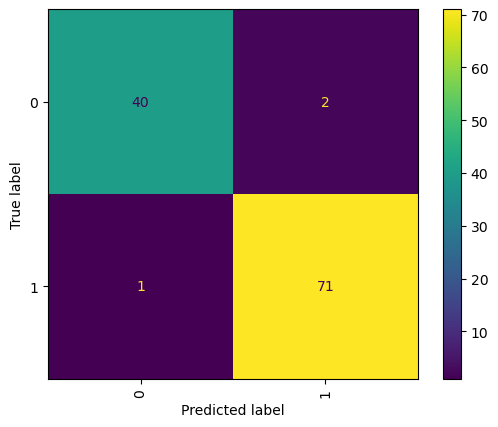

Exactitud: 0.9736842105263158
Sensibilidad: 0.9861111111111112
Especificidad: 0.9523809523809523

Umbral 0.5


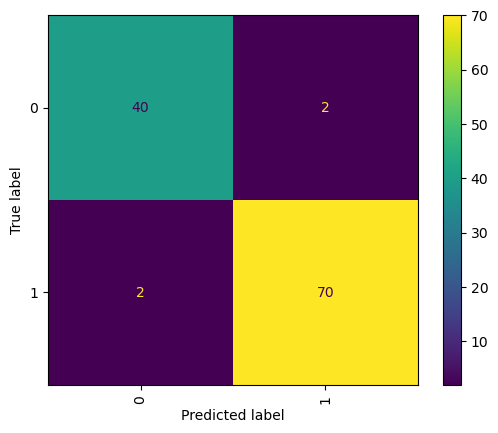

Exactitud: 0.9649122807017544
Sensibilidad: 0.9722222222222222
Especificidad: 0.9523809523809523

Umbral 0.7


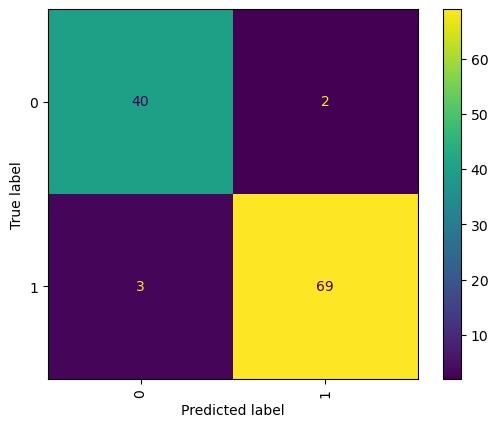

Exactitud: 0.956140350877193
Sensibilidad: 0.9583333333333334
Especificidad: 0.9523809523809523



In [8]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import matplotlib.pyplot as plt

modelo.fit(xEntre, yEntre)

yGorrito = modelo.predict_proba(xPrueba)[:, 1]

umbrales = [0.3, 0.5, 0.7]
for u in umbrales:
    print("Umbral", u)

    pred = (yGorrito >= u)

    cm = confusion_matrix(yPrueba, pred)
    cmd(confusion_matrix = cm, display_labels = modelo.classes_).plot(xticks_rotation = "vertical");
    plt.show()

    tn, fp, fn, tp = cm.ravel()

    acc = (tp + tn) / (tp + tn + fp + fn)
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)
    
    print("Exactitud:", acc)
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print()

Se pueden ver tres resultados distintos, ya que aunque cada uno de los modelos tienen una exactitud aproximada de 0.95, la sensibilidad del modelo con el umbral de 0.3 es el mas alto y este va disminuyendo conforme el umbral crece, mientras que para la especificidad es alreves. 

Aun asi, en promedio los tres valores de los tres modelos tienen un alto grado de similitud, significando que cualquiera de los tres modelos podria ser adecuado para su uso.

Para poder visualizar mejor estos datos se generara una Curva ROC con base a estos modelos, y debido a la naturaleza de la Curva ROC, tambien los de distintos umbrales. 
Para esto se requeriran las funciones roc_curve y roc_auc_score de sklearn.metrics

Adicionalmente se calculara el area bajo la curva generada.

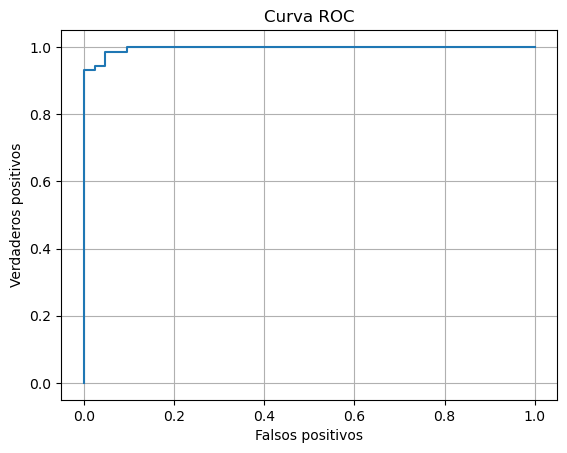

AUC: 0.9963624338624338


In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, umbrales = roc_curve(yPrueba, yGorrito)

auc = roc_auc_score(yPrueba, yGorrito)

plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC")
plt.grid(True)
plt.show()

print("AUC:", auc)

En la gráfica resultante, podemos ver como el modelo pareciera estar compuesta por dos lineas rectas unidas por una curva pequeña, el cual es ideal ya que significa que independientemente de su sensibilidad / especificidad, seguira acertando correctamente en la gran mayoria de los casos. En este caso en particular, de un aproximado del 99.6%. El unico aspecto negativo que conlleva este valor, es la posibilidad de sobreajuste. Es decir, que el modelo ya no podria predecir adecuadamente los resultados de nuevos datos.

Para poder ver de manera mas particular como es que cada variable afecta en la salida, se generara una tabla de las variables y sus coeficientes respectivos. Para mayor facilidad de visualizacion y entendimiento, seran ordenados de mayor a menor.

In [14]:
coef = modelo.coef_[0]

tabla_coef = pd.DataFrame({
    "Variable": xEntre.columns,  
    "Coeficiente": coef,
})

print("\nCoeficientes del modelo logístico:")
display(tabla_coef.sort_values("Coeficiente", ascending = False))


Coeficientes del modelo logístico:


,Variable,Coeficiente
0,mean radius,1.101948
11,texture error,1.077086
20,worst radius,0.214612
1,mean texture,0.156474
15,compactness error,0.065077
3,mean area,0.016733
19,fractal dimension error,0.012531
12,perimeter error,0.000981
16,concavity error,-0.003548
23,worst area,-0.011691


Dentro de los coeficientes resultantes, se puede ver que hay varios coeficientes con un valor aproximado a 0, como mean area (0.020931), compactness error (0.006029), y fractal dimension error	(0.002393), los cuales son las variables que MENOS afectan el resultado final en si se predice si es 1 o 0.

Mientras tanto, las caracteristicas que MAS influyen en la generacion del cancer de mama son el mean radius (1.10), worst radius (0.77), y el perimeter error (0.61). Por el otro lado, las variables que disminuyen la probabilidad de que el tumor sea maligno son worst concave points (-0.47), worst compactness (-0.50), y el worst concavity (-1.10).
